In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 📚 assignments

In [5]:
hotels = pd.read_excel('./data/HotelCustomersDataset.xlsx')
hotels.head(2)

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## assignment 1
subplots

/var/folders/6m/0djhjcm16l566_6h_pcqsfmh0000gn/T/ipykernel_4772/2533730298.py:25: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax_list[0].get_shared_x_axes().join(ax_list[0], *ax_list)
/var/folders/6m/0djhjcm16l566_6h_pcqsfmh0000gn/T/ipykernel_4772/2533730298.py:26: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax_list[0].get_shared_y_axes().join(ax_list[0], *ax_list)


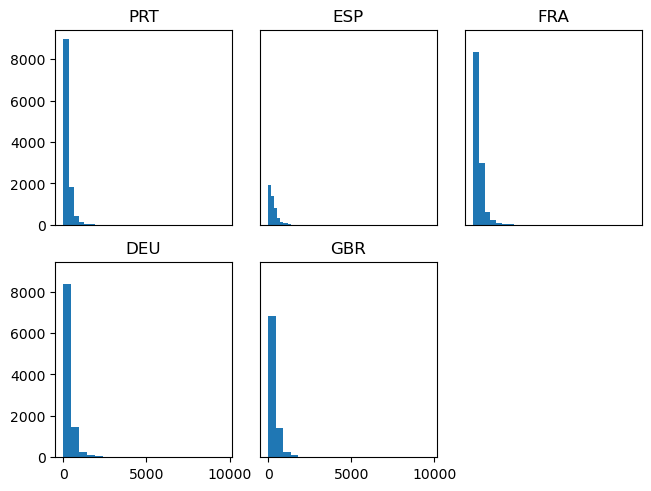

In [6]:
# solution 1
country_list = ['PRT', 'ESP', 'FRA', 'DEU', 'GBR']
ax_list = []
nrows, ncols = (2, 3)

fig = plt.figure(constrained_layout=True)

for i, country in enumerate(country_list):
    ax = fig.add_subplot(nrows, ncols, i+1)
    ax.hist(
        hotels
        .query(f"Nationality=='{country}' & RoomNights < 15")
        .loc[:, 'LodgingRevenue'],
        bins=20
    )
    
    ax.set_title(f"{country}")
    ax_list.append(ax)
    
    if i % ncols != 0:
        ax.set_yticks([])
        
    if (i / ncols) < nrows - 1:
        ax.set_xticks([])
        
ax_list[0].get_shared_x_axes().join(ax_list[0], *ax_list)
ax_list[0].get_shared_y_axes().join(ax_list[0], *ax_list)

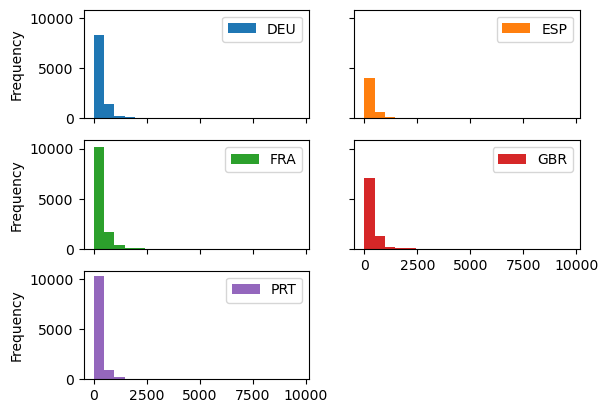

In [8]:
# solution 2
hotels_pivot = (
    hotels
    .query('Nationality in @country_list and RoomNights < 15')
    .pivot_table(
        index='ID',
        columns='Nationality',
        values='LodgingRevenue'
    )
)

hotels_pivot.plot.hist(
    subplots=True,
    bins=20,
    layout=(3, 2),
    sharex=True,
    sharey=True
);